<a href="https://colab.research.google.com/github/Azena8/Azena8/blob/main/US_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT THE DATASET FROM KAGGLE TO COLLAB**

In [13]:
! pip install -q kaggle

In [14]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azenafathima","key":"647f145cc0246c2209ba1be35def46b6"}'}

In [18]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
 ! kaggle datasets list

ref                                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                               1KB  2022-03-25 09:17:26           2836        190  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                  2KB  2022-03-03 00:26:02           2997         97  1.0              
datasets/prasertk/netflix-daily-top-10-in-us                              Netflix daily top 10                                 70KB  2022-03-12 13:22:19           1356         35  1.0              
datasets/v

In [21]:
!kaggle datasets download -d sobhanmoosavi/us-accidents --unzip

 95% 256M/269M [00:01<00:00, 154MB/s]
100% 269M/269M [00:01<00:00, 150MB/s]


In [22]:
data_filename = '/content/US_Accidents_Dec21_updated.csv'

Data Preparation and Cleaning
-load file using panda
-look at the info
-FIX any missing values

In [11]:
 import pandas as pd


In [23]:
df = pd.read_csv(data_filename)

In [24]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


analyse what info the file holds 

In [25]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [26]:
len(df.columns)

47

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [27]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


ask and answer questions
1]  are there more accidents in warmer or colder areas
2]  states with highest number of accidents
3]  how about per capita
4]newyork not here mention it in analysis
5]which state has more cities of high accident rate
6] which time of the day are accidents more frequent
7] whih days of the weekhae more accident
8] which month has more accidents
9]trend of accidentts
  

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

check missing values

In [29]:
missing_percent = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percent

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

type of the above

In [30]:
type(missing_percent)

pandas.core.series.Series

plot missing percent
first remove null values to have a better idea

In [31]:
missing_percent[missing_percent != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

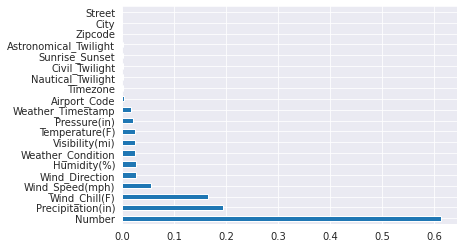

In [32]:
missing_percent[missing_percent != 0].plot(kind ='barh')

Remove columns that we don't want to use

Exploratory data analysis and visualisation

In [33]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

let's analyse some columns
1. distance,city
2.weather condition
3 start time
4 temperature
5 start lat,start lng

city analysis

In [48]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [40]:
cities = df.City.unique()
len(cities)

11682

analyse the number of cities with high accidents

In [34]:
cities_high_accidents = df.City.value_counts()
cities_high_accidents


Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [51]:
cities_high_accidents[:100]


Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Norwalk          3950
Birmingham       3925
Fremont          3924
Fairfax          3898
Colton           3824
Name: City, Length: 100, dtype: int64

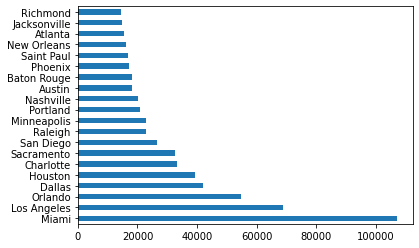

In [55]:
cities_high_accidents[:20].plot(kind='barh')

newyork is highly populous but not shown .so check if newyyork is present
:

In [52]:
'New York' in df.City

False

In [54]:
'NY'in df.State

False

New York not in list -mention this in analysis

visualising high accident prone cities in graphs 

In [2]:
import seaborn as sns
sns.set_style("darkgrid")

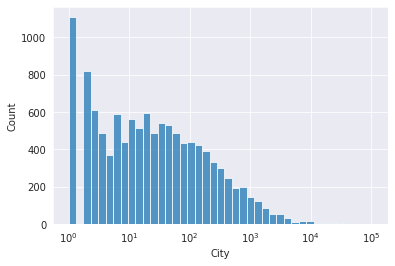

In [35]:
sns.histplot(cities_high_accidents,log_scale =True)

In [36]:
cities_high_accidents[cities_high_accidents == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

**INSIGHTS **
NO OF CITIES WITH 1 ACCIDENT IS 1110

In [37]:
high_accident_cities = cities_high_accidents[cities_high_accidents >=1000]
low_accident_cities = cities_high_accidents[cities_high_accidents < 1000]

In [41]:
len(high_accident_cities) / len(cities)

0.04245848313644924

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


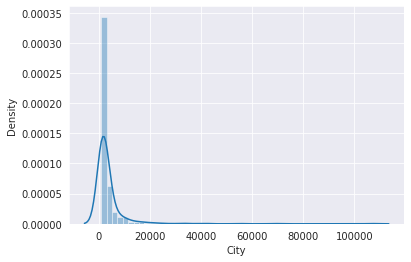

In [42]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


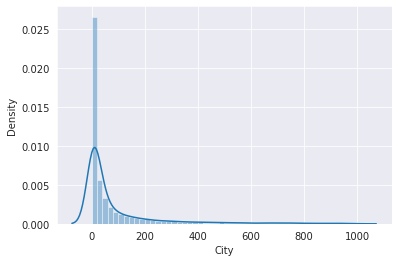

In [43]:
sns.distplot(low_accident_cities)

**INSIGHTS SO FAR**
LESS THAN 4% OF CITIES HAVE MORE THAN 1000 ACCIDENTS PER YEAR 


**START TIME**

In [44]:
 df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [45]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [46]:
#getting hour from timestamp to know which time most accidents happened
df.Start_Time.dt.hour 

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


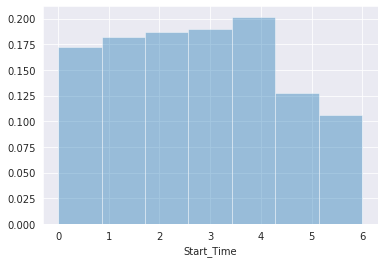

In [50]:
 sns.distplot(df.Start_Time.dt.dayofweek, bins=7 ,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


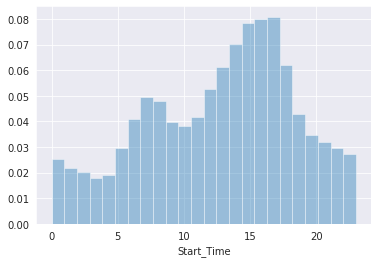

In [54]:
 sns.distplot(df.Start_Time.dt.hour, bins=24 , kde=False, norm_hist=True)

## 12pm-7pm accidents are highest


Is the distribution of acidents by hour the same on weekends as on weekdays


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


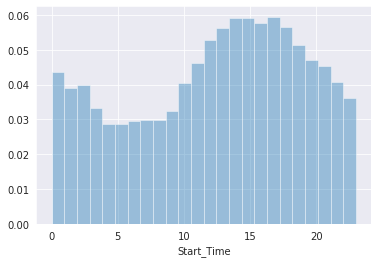

In [60]:
sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday.dt.hour, bins=24 ,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


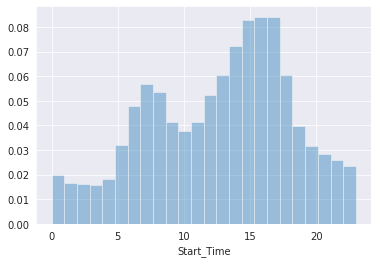

In [61]:
#monday
monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday.dt.hour, bins=24 ,kde=False,norm_hist=True)

on sunday the peak is between 10-23
monday the peak is between 12-20


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


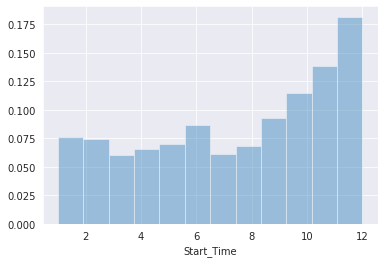

In [63]:

sns.distplot(df.Start_Time.dt.month, bins=12 ,kde=False,norm_hist=True)

accidents are less in summer more in winter

lets look at 2019

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


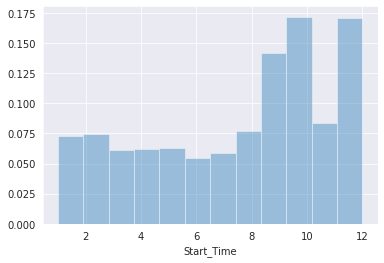

In [65]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12 ,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


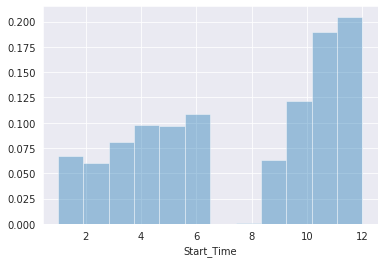

In [66]:
#2020
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month, bins=12 ,kde=False,norm_hist=True)

START LATITUDE AND START LONGITUDE-


In [67]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [68]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

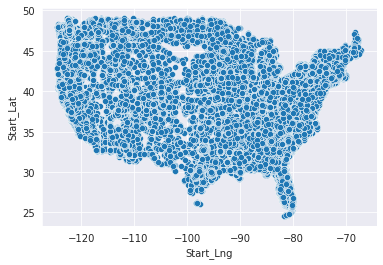

In [69]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

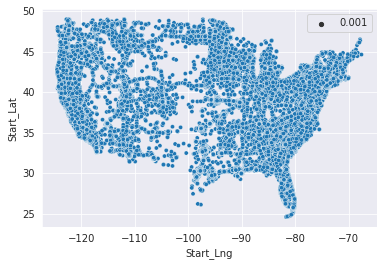

In [70]:
#TRY REDUING THE SIZE OF THE PLOT for a sample
sample = df.sample(int(0.11 * len(df)))
sns.scatterplot(x=sample.Start_Lng,y=sample.Start_Lat, size = 0.001)

lets try a map
import folium for this

In [71]:
import folium

In [73]:
folium.Map()

In [87]:

#choose a loation to plot in map
lat,lng = df.Start_Lat[0],df.Start_Lng[0]
lat,lng

(40.10891, -83.09286)

In [88]:
#add the marked to a map to locate the place
map = folium.Map()
marker = folium.Marker((lat,lng))
marker.add_to(map)
map

let us create a heat map to know the intensity of accidents based on locations


In [94]:
#for heat map we need loation co ordinated in pairs
#so create a lat,lon pair
zip(list(df.Start_Lat),list(df.Start_Lng))


In [95]:
 from folium.plugins import HeatMap


In [102]:
sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))  

In [103]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

**SUMMARY**
- MISSING DATA- NEWYORK IS NOT AVAILABLE IN THE DATA

-LESS THAN 4% CITIES HAVE MORE THAN 1000 EARLY ACCIDENTS

-MORE ACCIDENTS HAPPEN DURING WEEKDAS THAN WEEKEND

-ACCIDENTS ARE  MOSTLY HIGH DURING  THE TIME 12-20

-MORE ACCIDENTS ARE NOTED DURING WINTER (NOVEMBER-DECEMBER) THAN SUMMER SEASON.

-OVER 1110 CITIES HAVE REPORTED JUST ONE ACCIDENT
